<a href="https://colab.research.google.com/github/viniciusfranca019/group-project-codenation/blob/main/Clusteriza%C3%A7%C3%A3o_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código de clusterização implementado conforme modelo disponivel no link abaixo:

[Find and Visualize clusters with K-Means](https://app.datacamp.com/workspace/w/2315d3ec-481c-4599-bc71-d2f32a961cbb/edit)

# Clusterização dos dados do mercado

In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')

In [74]:
df = pd.read_csv('/content/drive/MyDrive/Drive_projeto_Codenation/OHE_df.csv').drop(columns=['Unnamed: 0'])

df.head()

,id,sg_uf_AC,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,natureza_juridica_macro_ADMINISTRACAO PUBLICA,natureza_juridica_macro_CARGO POLITICO,natureza_juridica_macro_ENTIDADES EMPRESARIAIS,natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS,natureza_juridica_macro_INSTITUICOES EXTRATERRITORIAIS,natureza_juridica_macro_OUTROS,natureza_juridica_macro_PESSOAS FISICAS,fl_rm_NAO,fl_rm_SIM,nm_segmento_ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,nm_segmento_AGRICULTURA PECUARIA PRODUCAO FLORESTAL PESCA E AQUICULTURA,nm_segmento_AGUA ESGOTO ATIVIDADES DE GESTAO DE RESIDUOS E DESCONTAMINACAO,nm_segmento_ALOJAMENTO E ALIMENTACAO,nm_segmento_ARTES CULTURA ESPORTE E RECREACAO,nm_segmento_ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMENTARES,nm_segmento_ATIVIDADES FINANCEIRAS DE SEGUROS E SERVICOS RELACIONADOS,nm_segmento_ATIVIDADES IMOBILIARIAS,nm_segmento_ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,nm_segmento_COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS,nm_segmento_CONSTRUCAO,nm_segmento_EDUCACAO,nm_segmento_ELETRICIDADE E GAS,nm_segmento_INDUSTRIAS DE TRANSFORMACAO,nm_segmento_INDUSTRIAS EXTRATIVAS,nm_segmento_INFORMACAO E COMUNICACAO,nm_segmento_ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUICOES EXTRATERRITORIAIS,nm_segmento_OUTRAS ATIVIDADES DE SERVICOS,nm_segmento_SAUDE HUMANA E SERVICOS SOCIAIS,nm_segmento_SERVICOS DOMESTICOS,nm_segmento_TRANSPORTE ARMAZENAGEM E CORREIO,fl_spa_False,fl_spa_True,fl_antt_False,...,sg_uf_matriz_MT,sg_uf_matriz_PA,sg_uf_matriz_PB,sg_uf_matriz_PE,sg_uf_matriz_PI,sg_uf_matriz_PR,sg_uf_matriz_RJ,sg_uf_matriz_RN,sg_uf_matriz_RO,sg_uf_matriz_RR,sg_uf_matriz_RS,sg_uf_matriz_SC,sg_uf_matriz_SE,sg_uf_matriz_SP,sg_uf_matriz_TO,de_saude_tributaria_AMARELO,de_saude_tributaria_AZUL,de_saude_tributaria_CINZA,de_saude_tributaria_LARANJA,de_saude_tributaria_VERDE,de_saude_tributaria_VERMELHO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_nivel_atividade_MUITO BAIXA,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,True,14.457534,False,False,False,False,False,False,True,True,0.0,0.0,3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,True,1.463014,False,False,False,True,False,False,True,True,0.0,0.0,210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,True,7.093151,False,False,False,True,False,False,False,True,0.0,0.0,50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,True,6.512329,False,False,False,False,False,False,True,True,0.0,0.0,210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,True,3.200000,False,False,False,False,False,False,True,True,0.0,0.0,210000.0,210000.0,0


In [75]:
# g = sns.PairGrid(df)
# g.map(sns.scatterplot);
keep_ids_slice = list(df['id'])
columns_array = df.columns
df_without_id = df.set_index('id')

In [76]:
df_without_id.describe()

,sg_uf_AC,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,natureza_juridica_macro_ADMINISTRACAO PUBLICA,natureza_juridica_macro_CARGO POLITICO,natureza_juridica_macro_ENTIDADES EMPRESARIAIS,natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS,natureza_juridica_macro_INSTITUICOES EXTRATERRITORIAIS,natureza_juridica_macro_OUTROS,natureza_juridica_macro_PESSOAS FISICAS,fl_rm_NAO,fl_rm_SIM,nm_segmento_ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,nm_segmento_AGRICULTURA PECUARIA PRODUCAO FLORESTAL PESCA E AQUICULTURA,nm_segmento_AGUA ESGOTO ATIVIDADES DE GESTAO DE RESIDUOS E DESCONTAMINACAO,nm_segmento_ALOJAMENTO E ALIMENTACAO,nm_segmento_ARTES CULTURA ESPORTE E RECREACAO,nm_segmento_ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMENTARES,nm_segmento_ATIVIDADES FINANCEIRAS DE SEGUROS E SERVICOS RELACIONADOS,nm_segmento_ATIVIDADES IMOBILIARIAS,nm_segmento_ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,nm_segmento_COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS,nm_segmento_CONSTRUCAO,nm_segmento_EDUCACAO,nm_segmento_ELETRICIDADE E GAS,nm_segmento_INDUSTRIAS DE TRANSFORMACAO,nm_segmento_INDUSTRIAS EXTRATIVAS,nm_segmento_INFORMACAO E COMUNICACAO,nm_segmento_ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUICOES EXTRATERRITORIAIS,nm_segmento_OUTRAS ATIVIDADES DE SERVICOS,nm_segmento_SAUDE HUMANA E SERVICOS SOCIAIS,nm_segmento_SERVICOS DOMESTICOS,nm_segmento_TRANSPORTE ARMAZENAGEM E CORREIO,fl_spa_False,fl_spa_True,fl_antt_False,fl_antt_True,...,sg_uf_matriz_AP,sg_uf_matriz_BA,sg_uf_matriz_CE,sg_uf_matriz_DF,sg_uf_matriz_ES,sg_uf_matriz_GO,sg_uf_matriz_MA,sg_uf_matriz_MG,sg_uf_matriz_MS,sg_uf_matriz_MT,sg_uf_matriz_PA,sg_uf_matriz_PB,sg_uf_matriz_PE,sg_uf_matriz_PI,sg_uf_matriz_PR,sg_uf_matriz_RJ,sg_uf_matriz_RN,sg_uf_matriz_RO,sg_uf_matriz_RR,sg_uf_matriz_RS,sg_uf_matriz_SC,sg_uf_matriz_SE,sg_uf_matriz_SP,sg_uf_matriz_TO,de_saude_tributaria_AMARELO,de_saude_tributaria_AZUL,de_saude_tributaria_CINZA,de_saude_tributaria_LARANJA,de_saude_tributaria_VERDE,de_saude_tributaria_VERMELHO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_nivel_atividade_MUITO BAIXA,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
count,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,...,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.00000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,432292.000000,4.322920e+05,4.322920e+05,432292.000000
mean,0.044296,0.176751,0.277995,0.166415,0.212854,0.121689,0.006274,0.000028,0.222977,0.084406,0.000007,0.683742,0.002568,0.515390,0.484610,0.005947,0.007169,0.002720,0.064160,0.012054,0.045997,0.007331,0.005915,0.036496,0.463360,0.054838,0.024335,0.001353,0.069495,0.002043,0.011737,0.000021,0.128286,0.022129,0.001312,0.033302,0.999352,0.000648,0.992424,0.007576,...,0.000035,0.000544,0.002103,0.002822,0.000224,0.000444,0.272836,0.000703,0.000116,0.000581,0.000937,0.000474,0.001032,0.163743,0.000682,0.001515,0.208556,0.118982,0.000120,0.000294,0.000280,0.000042,0.006442,0.000150,0.209537,0.243227,0.

In [77]:
df_without_id.shape


(432292, 94)

In [78]:
scaler = StandardScaler()

df_without_id = scaler.fit_transform(df_without_id)

In [79]:
normalized_data = pd.DataFrame(df_without_id)

In [80]:
type(normalized_data)

pandas.core.frame.DataFrame

In [81]:
!pip install yellowbrick

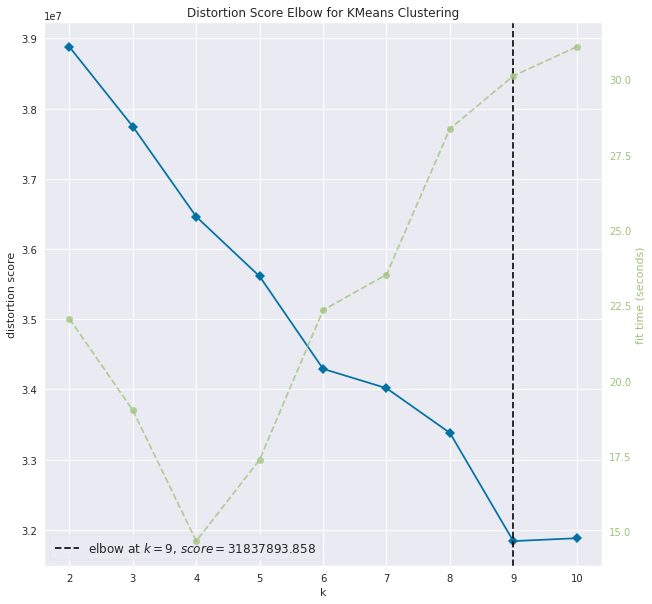

In [82]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
plt.figure(figsize=(10,10))

visualizer = KElbowVisualizer(model)
visualizer.fit(normalized_data)    


visualizer.show()

In [84]:
kmeans = KMeans(n_clusters = 9)
kmeans = kmeans.fit(df_without_id)
pred_y = kmeans.predict(df_without_id)

print(kmeans, pred_y)

KMeans(n_clusters=9) [3 5 1 ... 8 6 6]


In [86]:
dir(kmeans)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',
 'predict',
 'random_

In [87]:
market_cluster_labels = kmeans.labels_
market_cluster_labels

array([3, 5, 1, ..., 8, 6, 6], dtype=int32)

In [103]:
print(df_without_id.shape)
print(market_cluster_labels.shape)

(432292, 94)
(432292,)


In [104]:
np.unique(market_cluster_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [105]:
companies_and_clusters = pd.DataFrame({ 'company_ids': keep_ids_slice, 'cluster_labels': market_cluster_labels })

In [106]:
companies_and_clusters['cluster_labels'] = companies_and_clusters['cluster_labels'].map(lambda cluster: f"empresa do grupo {int(cluster) + 1}")

In [107]:
companies_and_clusters

,company_ids,cluster_labels
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,empresa do grupo 4
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,empresa do grupo 6
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,empresa do grupo 2
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,empresa do grupo 2
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,empresa do grupo 4
...,...,...
432287,469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3...,empresa do grupo 4
432288,656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb...,empresa do grupo 6
432289,9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1...,empresa do grupo 9
432290,84db0f17467cf4f02439e01ade57150b6ac59d9dae53ed...,empresa do grupo 7


In [108]:
companies_and_clusters.to_csv('normalized_data_clusters.csv')